In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

sns.set_context("talk")
mpl.rcParams['figure.figsize'] = (8, 6)


import networkx as nx

from glob import glob
from pathlib import Path





In [6]:
RegionsNames=pd.read_csv("data/aal_extended_withCoords.csv", header=None).iloc[:,1:]

In [17]:
files=os.listdir("data/DataSujetos/")
files

['N1_suj1.csv',
 'N1_suj10.csv',
 'N1_suj11.csv',
 'N1_suj12.csv',
 'N1_suj13.csv',
 'N1_suj14.csv',
 'N1_suj15.csv',
 'N1_suj16.csv',
 'N1_suj17.csv',
 'N1_suj18.csv',
 'N1_suj2.csv',
 'N1_suj3.csv',
 'N1_suj4.csv',
 'N1_suj5.csv',
 'N1_suj6.csv',
 'N1_suj7.csv',
 'N1_suj8.csv',
 'N1_suj9.csv',
 'N2_suj1.csv',
 'N2_suj10.csv',
 'N2_suj11.csv',
 'N2_suj12.csv',
 'N2_suj13.csv',
 'N2_suj14.csv',
 'N2_suj15.csv',
 'N2_suj16.csv',
 'N2_suj17.csv',
 'N2_suj18.csv',
 'N2_suj2.csv',
 'N2_suj3.csv',
 'N2_suj4.csv',
 'N2_suj5.csv',
 'N2_suj6.csv',
 'N2_suj7.csv',
 'N2_suj8.csv',
 'N2_suj9.csv',
 'N3_suj1.csv',
 'N3_suj10.csv',
 'N3_suj11.csv',
 'N3_suj12.csv',
 'N3_suj13.csv',
 'N3_suj14.csv',
 'N3_suj15.csv',
 'N3_suj16.csv',
 'N3_suj17.csv',
 'N3_suj18.csv',
 'N3_suj2.csv',
 'N3_suj3.csv',
 'N3_suj4.csv',
 'N3_suj5.csv',
 'N3_suj6.csv',
 'N3_suj7.csv',
 'N3_suj8.csv',
 'N3_suj9.csv',
 'W_suj1.csv',
 'W_suj10.csv',
 'W_suj11.csv',
 'W_suj12.csv',
 'W_suj13.csv',
 'W_suj14.csv',
 'W_suj15.csv'

In [35]:
for state in ["W","N1","N2","N3"]:
    files=Path("data/DataSujetos").glob(f'{state}_*.csv')
    print(f"La cantidad de sujetos en el estadp {state} son :{len(list(files))}")

La cantidad de sujetos en el estadp W son :18
La cantidad de sujetos en el estadp N1 son :18
La cantidad de sujetos en el estadp N2 son :18
La cantidad de sujetos en el estadp N3 son :18


# 5- Manipulacion de datos

### Graficar la matriz de correlaciones entre regiones (es decir, la "matriz de adyacencia pesada") para el sujeto 2 de la condición despierto ("Wake")

In [48]:
w_s1 = pd.read_csv("data/DataSujetos/W_suj1.csv" ,header=None)
A_pesada=w_s1.values
n=A_pesada.shape[0]
A_pesada = A_pesada - np.diag(np.ones(n))
A_pesada.shape

(116, 116)

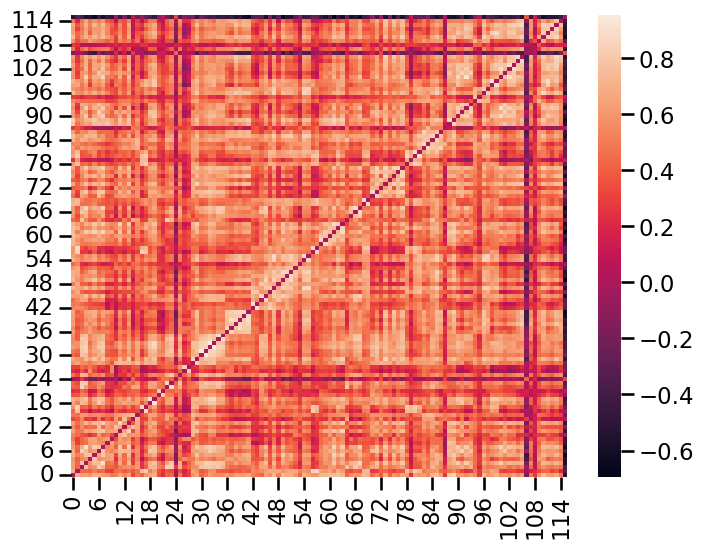

In [49]:
sns.heatmap(A_pesada)
plt.xlim(0,n)
plt.ylim(0,n)
plt.show()

### Transformar dicha matriz de adyacencia pesada a una matriz de adyancia binaria Ai,j que represente una densidad de enlaces δ=0.08. ¿Cuál es el valor de umbral de correlación entre pares de regiones que tuvo que utilizar?

In [74]:
def density_to_th(W,d):
    n=W.shape[0]
    tril_idx = np.tril_indices(n,-1)
    c= sorted(W[tril_idx].reshape(-1), reverse=True)
    return c[int((len(c)-1)*d)]

In [81]:
th=density_to_th(A_pesada,0.08)
th

np.float64(0.72725)

In [82]:
A=np.abs(A_pesada) >=th

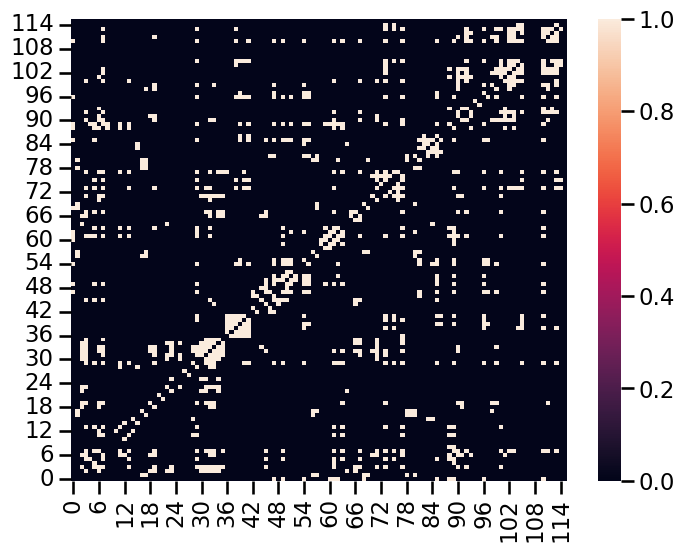

In [83]:
sns.heatmap(A)
plt.xlim(0,n)
plt.ylim(0,n)
plt.show()

### Utilizando Ai,j , obtener el grafo resultante G

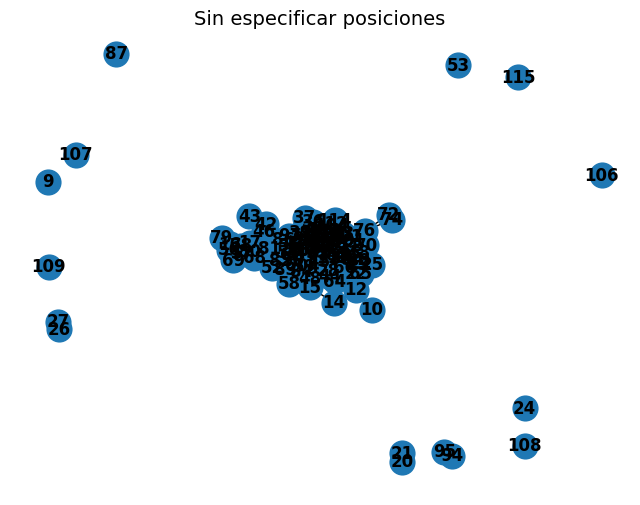

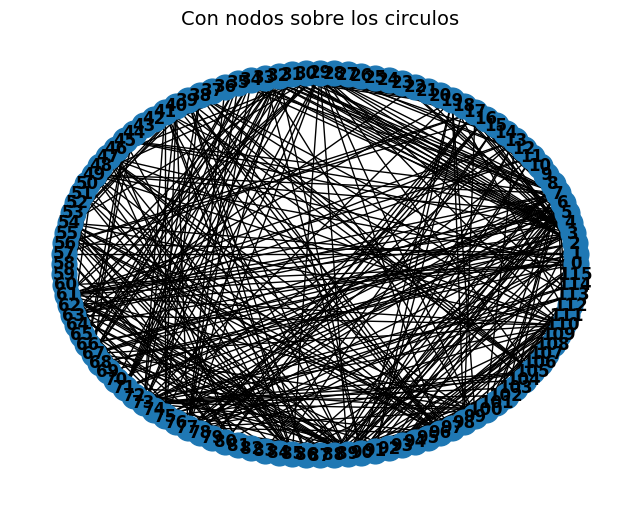

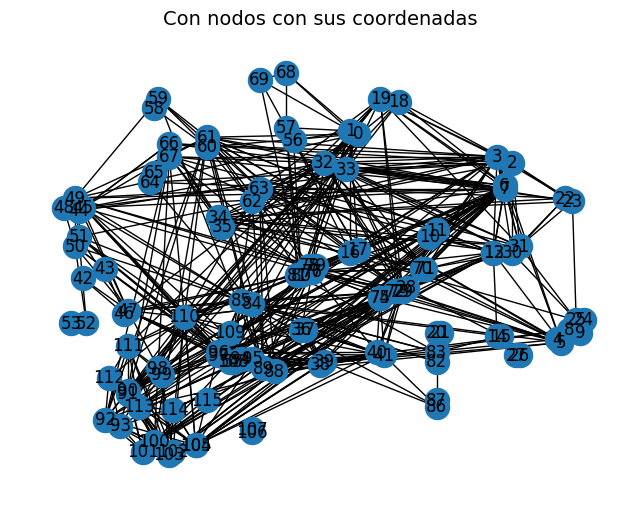

In [97]:
G=nx.from_numpy_array(A)
plt.figure(figsize=(8,6))
plt.title("Sin especificar posiciones",fontsize=14)
nx.draw(G, with_labels=True,font_weight = 'bold')


plt.figure(figsize=(8,6))
plt.title("Con nodos sobre los circulos",fontsize=14)
layout=nx.circular_layout(G)
nx.draw(G,layout,with_labels=True,font_weight='bold')

plt.figure(figsize=(8,6))
plt.title("Con nodos con sus coordenadas",fontsize=14)
layout =  dict(zip( range(n)  ,  np.array([RegionsNames[6].values , RegionsNames[7].values]).T))
nx.draw(G,layout,with_labels=True , linewidths=1)

### ¿Es G un grafo conectado? ¿Se puede calcular la distancia media entre pares de nodos d del grafo G? ¿Si no se puede, qué medida equivalente calcularías?

In [101]:
A.shape

(116, 116)

In [98]:
print('Es conectado?:', nx.is_connected(G))

Es conectado?: False


La distancia media no se puede calcular porque hay nodos que no estan conectados.

Podriamos :

- calcular la distancia media del componente gigante. 
- calcular la eficiencia global (promedio de la inversa de las distancias entre todos los pares de nodos)

### Calcular d para cada componente conectado de G. Calcular la eficiencia global eff del grafo G

In [ ]:
nx.connected_components

In [102]:
dir(nx)

['AmbiguousSolution',
 'ArborescenceIterator',
 'DiGraph',
 'EdgePartition',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 'SpanningTreeIterator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_clear_cache',
 '_dispatchable',
 '_lazy_import',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 'algebraicconnectivi

In [111]:
components={}
for i, component in enumerate(nx.connected_components(G)):
    print(i)
    print(component)

0
{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 110, 111, 112, 113, 114}
1
{9}
2
{20, 21}
3
{24}
4
{26, 27}
5
{53}
6
{87}
7
{94, 95}
8
{106}
9
{107}
10
{108}
11
{109}
12
{115}


In [112]:
for component in nx.connected_components(G):
    if (len(component)>1):
        subgraph = G.subgraph(component)
        d=nx.average_shortest_path_length(subgraph)
        print("------------------------------------------------------")
        print(f"Distancia del componente {component}:")
        print(f"{d}")

------------------------------------------------------
Distancia del componente {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 25, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 110, 111, 112, 113, 114}:
2.789108910891089
------------------------------------------------------
Distancia del componente {20, 21}:
1.0
------------------------------------------------------
Distancia del componente {26, 27}:
1.0
------------------------------------------------------
Distancia del componente {94, 95}:
1.0


In [119]:
print(f"Eficiencia global eff del Grafo :{nx.global_efficiency(G):0.4f}")

Eficiencia global eff del Grafo :0.3272


### Calcular el grado promedio < k >, el nodo con grado máximo kmax, el coeficiente de clustering promedio C =< Ci >

Usando matriz de ady

In [131]:
# Con bucle for
K=[]
for i in range(len(A)):
    k=0
    for j in range(len(A)):
        k = k + A[i,j]
    K.append(k)
sum=0
kmax=-1
nodo_kimax=-1
for i,ki in enumerate(K):
    sum= sum+ki
    if (ki>kmax):
        kmax=ki
        nodo_kimax=i+1

km = sum/len(A)
print(f"El grado promedio del grafo km = {km}")
print(f"El nodo con el grado kmax={kmax} es el nodo: {nodo_kimax}")


El grado promedio del grafo km = 9.206896551724139
El nodo con el grado kmax=29 es el nodo: 8


In [140]:
# Con funciones numpy
K=A.sum(0)
km= K.sum() / (len(A))
kmax=K.max()
nodo_kmax=K.argmax()+1

print(f"El grado promedio del grafo km = {km}")
print(f"El nodo con el grado kmax={kmax} es el nodo: {nodo_kmax}")

El grado promedio del grafo km = 9.206896551724139
El nodo con el grado kmax=29 es el nodo: 8


In [141]:
dir(nx)

['AmbiguousSolution',
 'ArborescenceIterator',
 'DiGraph',
 'EdgePartition',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 'SpanningTreeIterator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_clear_cache',
 '_dispatchable',
 '_lazy_import',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_connectivity',
 'algebraicconnectivi

Coeficiente de clustering promedio

In [145]:
Cm=nx.average_clustering(G)
print(f"La probabilidad de que dos vecinos de un nodo seleccionado al azar estén conectados entre si es de {Cm:0.2f}")

La probabilidad de que dos vecinos de un nodo seleccionado al azar estén conectados entre si es de 0.49


### Visualizar el grafo, ubicando los nodos en sus coordenadas cerebrales y coloreando cada nodo de acuerdo a su coeficiente de clustering Ci

In [150]:
degrees = G.degree()
nodes  = G.nodes()
np.asarray([degrees[n] for n in nodes])

array([12,  8, 13, 24,  3, 15, 17, 29,  2,  0,  1, 10,  3, 12,  2,  4,  6,
        8,  6, 16,  1,  1,  6,  8,  0,  4,  1,  1,  5, 28,  9, 16, 24, 18,
       14, 10,  6,  5, 13, 13, 11, 15,  3,  2,  4, 12,  4, 17,  3, 17,  9,
       10,  2,  0, 19, 11,  5,  7,  2,  6,  6, 23,  9, 15,  3,  2,  9, 16,
        4,  4,  4, 17,  2, 26,  2, 12,  6, 25,  5,  2,  9,  9,  4,  5,  6,
       21,  4,  0, 12, 26, 19,  8, 15,  7,  1,  1, 20,  6,  6, 13, 16,  9,
       15, 16,  9, 18,  0,  0,  0,  0, 26, 11,  8, 18,  5,  0])

In [160]:
np.asarray(list(dict(degrees).values()))

array([12,  8, 13, 24,  3, 15, 17, 29,  2,  0,  1, 10,  3, 12,  2,  4,  6,
        8,  6, 16,  1,  1,  6,  8,  0,  4,  1,  1,  5, 28,  9, 16, 24, 18,
       14, 10,  6,  5, 13, 13, 11, 15,  3,  2,  4, 12,  4, 17,  3, 17,  9,
       10,  2,  0, 19, 11,  5,  7,  2,  6,  6, 23,  9, 15,  3,  2,  9, 16,
        4,  4,  4, 17,  2, 26,  2, 12,  6, 25,  5,  2,  9,  9,  4,  5,  6,
       21,  4,  0, 12, 26, 19,  8, 15,  7,  1,  1, 20,  6,  6, 13, 16,  9,
       15, 16,  9, 18,  0,  0,  0,  0, 26, 11,  8, 18,  5,  0])

In [170]:
np.asarray(list(nx.clustering(G).values()))

array([0.48484848, 0.57142857, 0.51282051, 0.43478261, 1.        ,
       0.47619048, 0.35294118, 0.38916256, 1.        , 0.        ,
       0.        , 0.64444444, 0.        , 0.72727273, 0.        ,
       0.16666667, 0.66666667, 0.46428571, 0.8       , 0.44166667,
       0.        , 0.        , 0.66666667, 0.71428571, 0.        ,
       0.83333333, 0.        , 0.        , 0.4       , 0.35978836,
       0.69444444, 0.525     , 0.39130435, 0.43137255, 0.56043956,
       0.77777778, 0.73333333, 1.        , 0.53846154, 0.47435897,
       0.65454545, 0.51428571, 0.66666667, 1.        , 0.33333333,
       0.36363636, 0.5       , 0.43382353, 0.66666667, 0.51470588,
       0.55555556, 0.64444444, 1.        , 0.        , 0.43274854,
       0.69090909, 0.9       , 0.52380952, 1.        , 0.6       ,
       0.6       , 0.40316206, 0.44444444, 0.52380952, 0.33333333,
       1.        , 0.5       , 0.45833333, 0.5       , 0.83333333,
       0.66666667, 0.44852941, 1.        , 0.37538462, 1.     

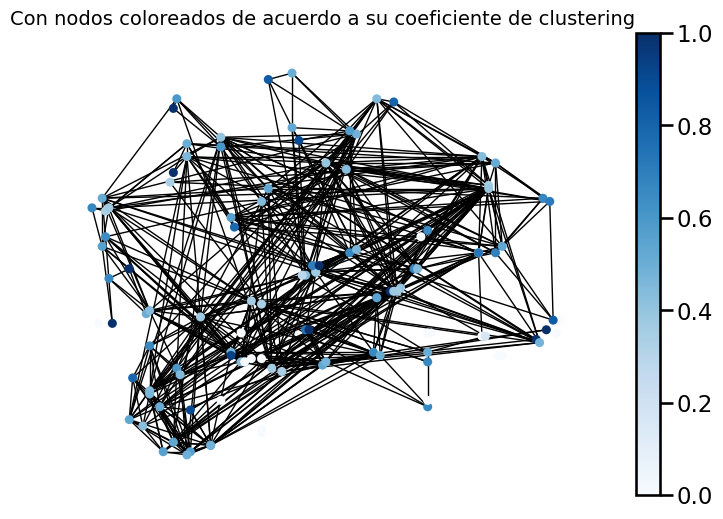

In [172]:
degrees = G.degree()
nodes = G.nodes()
n_color = np.asarray(list(nx.clustering(G).values()))

layout = dict(zip(range(n), np.array([RegionsNames[6].values, RegionsNames[7].values]).T))
vmin = min(n_color)
vmax = max(n_color)
cmap = plt.cm.Blues
norm = plt.Normalize(vmin = vmin, vmax=vmax)

plt.figure(figsize=(9,6))
plt.title('Con nodos coloreados de acuerdo a su coeficiente de clustering', fontsize=14)
nx.draw(G, layout, node_size=25, node_color=n_color, vmin=vmin, vmax=vmax,cmap=cmap)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=plt.gca())

plt.show()

In [180]:
[G.degree(n) for n in G.nodes()] == list(dict(G.degree()).values())

True

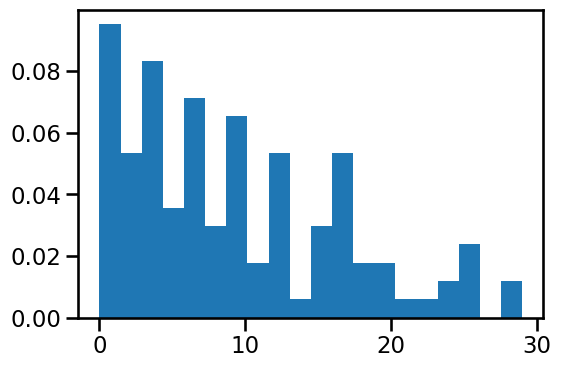

In [185]:
plt.figure(figsize=(6,4))
degrees = [G.degree(n) for n in G.nodes()]
hist,bins,_ = plt.hist(degrees,bins=20 , density=True)
plt.show()